### Load the Titanic Dataset

In [2]:
import pandas as pd

In [3]:
# Load the Titanic dataset
train_data = pd.read_csv('titanic_train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_data = pd.read_csv('titanic_test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Display the first few rows of the training data
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Check for Missing Values

In [7]:
# Check for missing values in the training dataset
missing_values = train_data.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Age         177
Cabin       687
Embarked      2
dtype: int64


### Explore Data Distributions

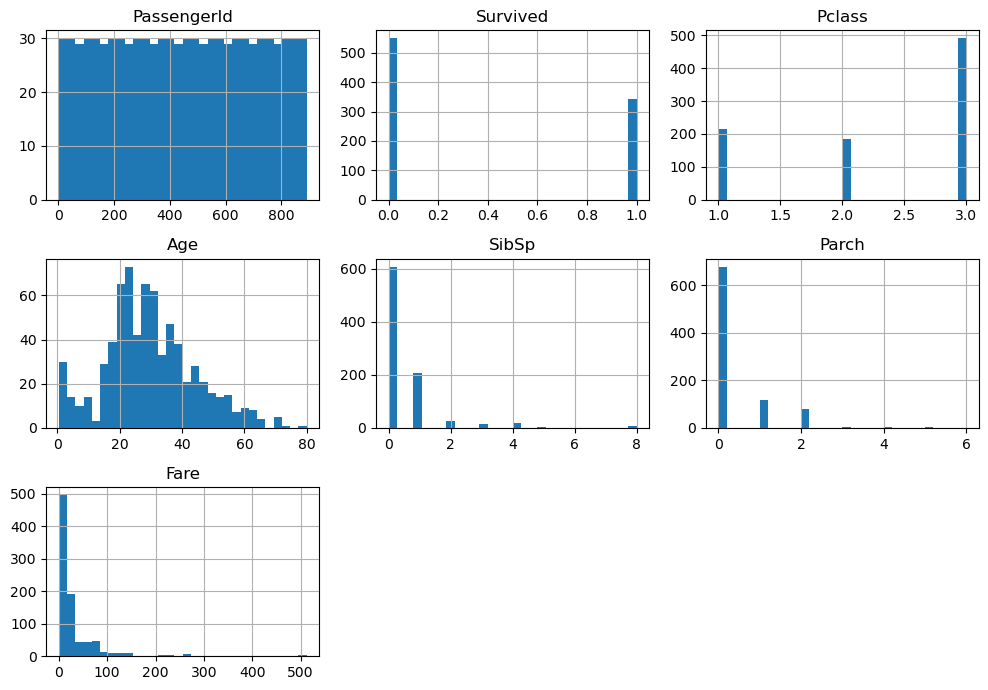

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
train_data.hist(bins=30, figsize=(10, 7))
plt.tight_layout()
plt.title("Histograms of Numerical Features")
plt.show()

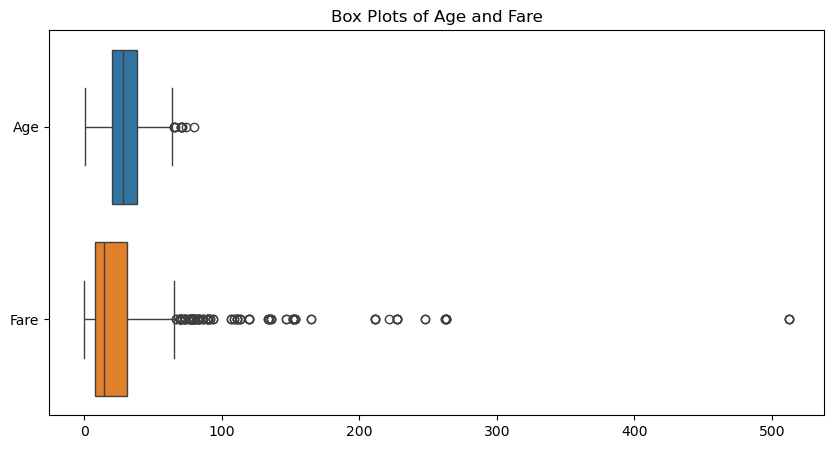

In [10]:
# Box plots for numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_data[['Age', 'Fare']], orient='h')
plt.title("Box Plots of Age and Fare")
plt.show()

### Visualize Relationships between Features and Survival

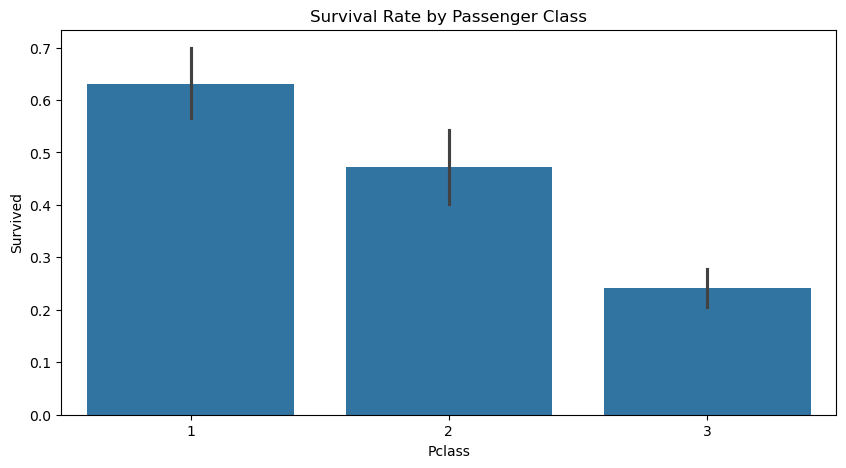

In [12]:
# Bar plot for categorical features
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title("Survival Rate by Passenger Class")
plt.show()

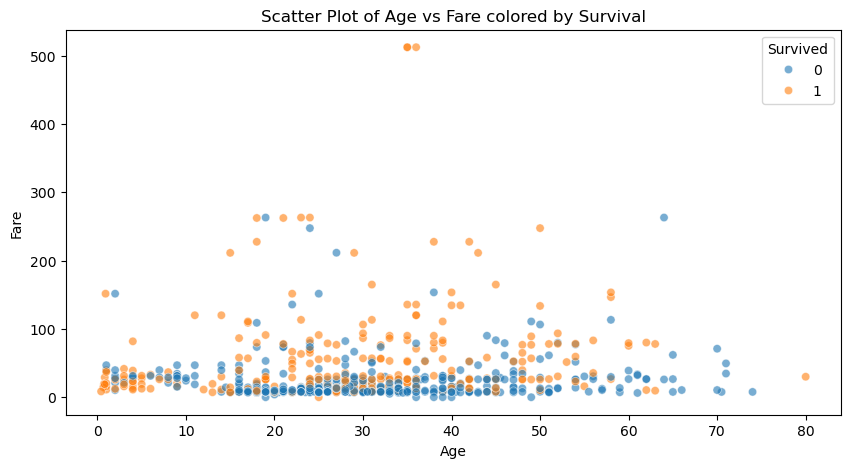

In [13]:
# Scatter plot for age vs fare colored by survival
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data, alpha=0.6)
plt.title("Scatter Plot of Age vs Fare colored by Survival")
plt.show()

### Data Preprocessing

####  Impute Missing Values

In [16]:
# Impute missing values in Age and Embarked columns
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Check for missing values again
print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


C:\Users\Aqsa Fatima\AppData\Local\Temp\ipykernel_12820\2154425419.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\Aqsa Fatima\AppData\Local\Temp\ipykernel_12820\2154425419.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

#### Encode Categorical Variables

In [18]:
# One-hot encoding for 'Embarked' and 'Sex'
train_data = pd.get_dummies(train_data, columns=['Embarked', 'Sex'], drop_first=True)

In [19]:
# Drop unnecessary columns
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

### Building Predictive Models

#### Split the Dataset

In [22]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
331,1,45.5,0,0,28.5000,False,True,True
733,2,23.0,0,0,13.0000,False,True,True
382,3,32.0,0,0,7.9250,False,True,True
704,3,26.0,1,0,7.8542,False,True,True
813,3,6.0,4,2,31.2750,False,True,False
...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,False,True,False
270,1,28.0,0,0,31.0000,False,True,True
860,3,41.0,2,0,14.1083,False,True,True
435,1,14.0,1,2,120.0000,False,True,False


In [24]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
709,3,28.0,1,1,15.2458,False,False,True
439,2,31.0,0,0,10.5000,False,True,True
840,3,20.0,0,0,7.9250,False,True,True
720,2,6.0,0,1,33.0000,False,True,False
39,3,14.0,1,0,11.2417,False,False,False
...,...,...,...,...,...,...,...,...
433,3,17.0,0,0,7.1250,False,True,True
773,3,28.0,0,0,7.2250,False,False,True
25,3,38.0,1,5,31.3875,False,True,False
84,2,17.0,0,0,10.5000,False,True,False


In [25]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [26]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

#### Choose Evaluation Metrics

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

#### Build LightGBM Model

In [41]:
!pip install lightgbm xgboost pandas matplotlib seaborn scikit-learn

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 989.2 kB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:37
   ---------------------------------------- 1.0/124

In [43]:
import lightgbm as lgb

In [45]:
# Create and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_pred = lgb_model.predict(X_test)

# Evaluate the model
print("LightGBM Model Evaluation:")
evaluate_model(y_test, lgb_pred)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


#### Build XGBoost Model

In [48]:
import xgboost as xgb

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
print("\nXGBoost Model Evaluation:")
evaluate_model(y_test, xgb_pred)


XGBoost Model Evaluation:
Accuracy: 0.8212
Precision: 0.8000
Recall: 0.7568
F1 Score: 0.7778


C:\Users\Aqsa Fatima\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:13:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


### Cross-Validation and Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [53]:
param_grid_lgb

{'num_leaves': [31, 50],
 'max_depth': [-1, 10, 20],
 'learning_rate': [0.01, 0.1, 0.2]}

In [55]:
grid_lgb = GridSearchCV(lgb.LGBMClassifier(), param_grid_lgb, scoring='f1', cv=5)
grid_lgb.fit(X_train, y_train)
print("Best parameters for LightGBM:", grid_lgb.best_params_)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [61]:
# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100]
}

In [63]:
param_grid_xgb

{'max_depth': [3, 5, 7],
 'learning_rate': [0.01, 0.1],
 'n_estimators': [50, 100]}

In [65]:
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, scoring='f1', cv=5)
grid_xgb.fit(X_train, y_train)
"Best parameters for XGBoost:", grid_xgb.best_params_

C:\Users\Aqsa Fatima\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Aqsa Fatima\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Aqsa Fatima\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:18:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Aqsa Fatima\anac

('Best parameters for XGBoost:',
 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50})

### Comparative Analysis

In [68]:
import numpy as np

# Create a DataFrame to compare the results
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, lgb_pred), accuracy_score(y_test, xgb_pred)],
    'Precision': [precision_score(y_test, lgb_pred), precision_score(y_test, xgb_pred)],
    'Recall': [recall_score(y_test, lgb_pred), recall_score(y_test, xgb_pred)],
    'F1 Score': [f1_score(y_test, lgb_pred), f1_score(y_test, xgb_pred)],
})

In [70]:
print(results)

      Model  Accuracy  Precision    Recall  F1 Score
0  LightGBM  0.826816   0.794521  0.783784  0.789116
1   XGBoost  0.821229   0.800000  0.756757  0.777778


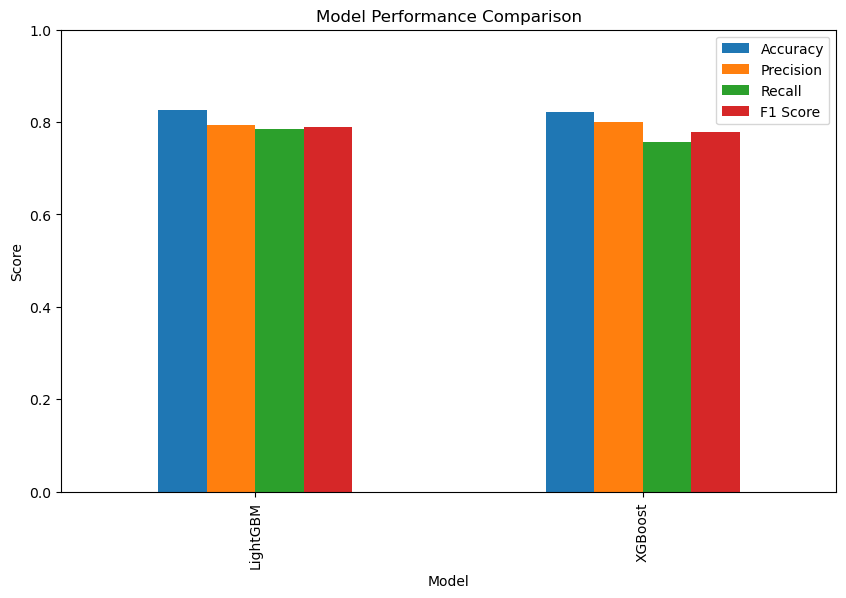

In [72]:
# Visualize the results
results.plot(x='Model', kind='bar', figsize=(10, 6), title='Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()